<a href="https://colab.research.google.com/github/buildwithdemis/machinelearning/blob/main/Capstone_01_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# Download latest version
import pandas as pd

!wget https://raw.githubusercontent.com/buildwithdemis/machinelearning/refs/heads/main/All_Attacks.csv

# Read the text file containing data using pandas
dataset = pd.read_csv('All_Attacks.csv', delimiter=';')

# Print the data
# Because there are a lot of data, use head() to only print the first few rows
dataset.head(10)

--2025-06-05 22:35:16--  https://raw.githubusercontent.com/buildwithdemis/machinelearning/refs/heads/main/All_Attacks.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1124997 (1.1M) [text/plain]
Saving to: ‘All_Attacks.csv.1’

All_Attacks.csv.1   100%[===================>]   1.07M  3.99MB/s    in 0.3s    

2025-06-05 22:35:17 (3.99 MB/s) - ‘All_Attacks.csv.1’ saved [1124997/1124997]



,second,src,dst,packetcount,src_ratio,dst_ratio,src_duration_ratio,dst_duration_ratio,TotalPacketDuration,TotalPacketLenght,src_packet_ratio,dst_packet_ratio,DioCount,DisCount,DaoCount,OtherMsg,label
0,61.0,2,32,1,0.500000,1.000000,0.013889,1.000000,0.020000,37,0.500000,1.000000,0,0,0,1,1
1,61.0,4,32,1,0.500000,1.000000,0.986111,1.000000,1.419998,37,0.500000,1.000000,0,0,0,1,1
2,62.0,24,16,2,0.666667,0.666667,0.751425,0.751425,0.008049,187,0.785714,0.785714,0,0,2,0,1
3,62.0,16,24,1,0.333333,0.333333,0.248576,0.248576,0.002663,51,0.214286,0.214286,0,0,0,1,1
4,63.0,16,24,1,1.000000,1.000000,1.000000,1.000000,0.002953,60,1.000000,1.000000,0,0,0,2,1
5,65.0,3,32,1,0.500000,0.500000,0.987151,0.987151,0.330002,37,0.266187,0.266187,0,0,0,1,1
6,65.0,36,35,1,0.500000,0.500000,0.012849,0.012849,0.004295,102,0.733813,0.733813,1,0,0,0,1
7,66.0,34,49,1,0.333333,1.000000,0.000000,1.000000,0.000000,26,0.175676,1.000000,0,1,0,1,1
8,66.0,39,49,1,0.333333,1.000000,0.333331,1.000000,0.309998,26,0.175676,1.000000,0,1,0,1,1
9,66.0,41,49,1,0.333333,1.000000,0.666669,1.000000,0.620003,96,0.648649,1.000000,1,0,0,0,1


In [3]:
# prompt: Using dataframe dataset: display information about the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   second               10845 non-null  float64
 1   src                  10845 non-null  int64  
 2   dst                  10845 non-null  int64  
 3   packetcount          10845 non-null  int64  
 4   src_ratio            10845 non-null  float64
 5   dst_ratio            10845 non-null  float64
 6   src_duration_ratio   10845 non-null  float64
 7   dst_duration_ratio   10845 non-null  float64
 8   TotalPacketDuration  10845 non-null  float64
 9   TotalPacketLenght    10845 non-null  int64  
 10  src_packet_ratio     10845 non-null  float64
 11  dst_packet_ratio     10845 non-null  float64
 12  DioCount             10845 non-null  int64  
 13  DisCount             10845 non-null  int64  
 14  DaoCount             10845 non-null  int64  
 15  OtherMsg             10845 non-null 

Summary statistics


In [4]:
dataset.describe()

,second,src,dst,packetcount,src_ratio,dst_ratio,src_duration_ratio,dst_duration_ratio,TotalPacketDuration,TotalPacketLenght,src_packet_ratio,dst_packet_ratio,DioCount,DisCount,DaoCount,OtherMsg,label
count,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000
mean,338.096081,19.472476,28.188658,1.566805,0.290404,0.377594,0.287160,0.435793,0.065952,98.319779,0.293646,0.352207,0.166067,0.009129,0.060858,30.859751,2.986906
std,145.679764,11.932040,10.311293,0.968465,0.212384,0.214736,0.304885,0.368901,0.193742,76.864911,0.228556,0.207988,0.411911,0.095111,0.406267,34.764335,1.427846
min,60.000000,0.000000,0.000000,1.000000,0.034483,0.034483,0.000000,0.000000,0.000000,23.000000,0.017747,0.017747,0.000000,0.000000,0.000000,0.000000,1.000000
25%,216.000000,13.000000,18.000000,1.000000,0.111111,0.200000,0.030957,0.057098,0.004272,37.000000,0.094629,0.200000,0.000000,0.000000,0.000000,5.000000,2.000000
50%,343.000000,16.000000,30.000000,1.000000,0.235294,0.333333,0.149697,0.360374,0.009460,78.000000,0.234436,0.313725,0.000000,0.000000,0.000000,21.000000,3.000000
75%,460.000000,26.000000,32.000000,2.000000,0.444444,0.500000,0.500000,0.847793,0.029968,115.000000,0.446512,0.453333,0.000000,0.000000,0.000000,42.000000,4.000000
max,591.000000,50.000000,51.000000,10.000000,1.000000,1.000000,1.000000,1.000000,3.610001,715.000000,1.000000,1.000000,4.000000,1.000000,7.000000,291.000000,5.000000


Distribution of attack classe

In [5]:
dataset['label'].value_counts()

,count
label,
1,2405
4,2273
3,2256
5,2102
2,1809


# Description of each column

**second** Simulation time in seconds when the packet or event was recorded. Useful for time-series or temporal pattern detection.

**src** Source node ID that sent the packet. Helps identify who initiated communication.

**dst** Destination node ID that received the packet. Together with src, this helps model communication patterns.

**packetcount** Number of packets exchanged in the given communication (or in the session/interval). Higher values might indicate abnormal activity like flooding.

**src_ratio** Proportion of total communication initiated by the source node (e.g., packets sent by src / total packets in session). Can reveal if a node is overly active.

**dst_ratio** Similar to src_ratio but for the destination node. Might be useful to detect unusual traffic received.

**src_duration_ratio** Proportion of time the source was involved in the communication compared to a time window/session. Possibly: src_duration / total_duration.

**dst_duration_ratio** Same as above but for destination node. Helps determine sustained targeting or behavior over time.

**TotalPacketDuration** Total time between first and last packet of the communication. Can help detect persistent vs. bursty traffic.

**TotalPacketLenght** Cumulative size of packets exchanged in bytes. Unusually high totals may suggest data exfiltration or flooding. (Note: “Lenght” is a typo — should be “Length”)

**src_packet_ratio** Ratio of packets sent by source node relative to total number of packets in the conversation/session.

**dst_packet_ratio** Ratio of packets received by destination node relative to total. A skewed value may suggest asymmetric behavior.

**DioCount** Number of DIO (DODAG Information Object) control messages sent — part of RPL (Routing Protocol for Low-Power and Lossy Networks). Could be used to detect routing manipulation or control-plane abuse.

**DisCount** Number of DIS (DODAG Information Solicitation) messages — used to request network topology info.

**DaoCount** Number of DAO (Destination Advertisement Object) messages — used to advertise destination routes.

**OtherMsg** Count of other message types not classified as DIO/DIS/DAO — possibly includes application or attack-specific traffic.

**label** Target variable. Value 1-5 for attack/malicious activity, and 0 for normal/benign behavior.


# Task 1: Data analysis and visualization

## Data Exploration

The **label** field is our target. A value of 1-5 means that an attack/malicious activity did occur at the conditions described by the features, whereas a value of 0 means no attack/malicious activity happened
 *   1: -> SHA
 *   2: -> DFA
 *   3: -> SFA
 *   4: -> SYA
 *   5: -> VNA

Because our targets can be a range of values from 0 or 5, we call this a multiclass classification model.

Now, let's plot the relationships between each feature and the target values. That helps us understand which features are more likely to influence the results:

## Map Attack Labels to Names

In [8]:
attack_map = {
    1: 'SHA',
    2: 'DFA',
    3: 'SFA',
    4: 'SYA',
    5: 'VNA'
}

dataset['AttackType'] = dataset['label'].map(attack_map)



## Class Distribution Visualization

<ipython-input-21-0c911d3b7b21>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AttackType', data=dataset, palette='Set2')


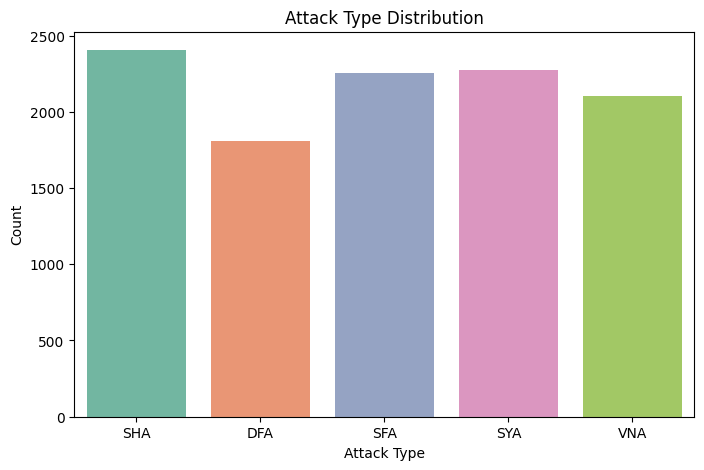

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8, 5))
sns.countplot(x='AttackType', data=dataset, palette='Set2')
plt.title('Attack Type Distribution')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.show()

## Correlation Analysis

Understand relationships between numerical features:

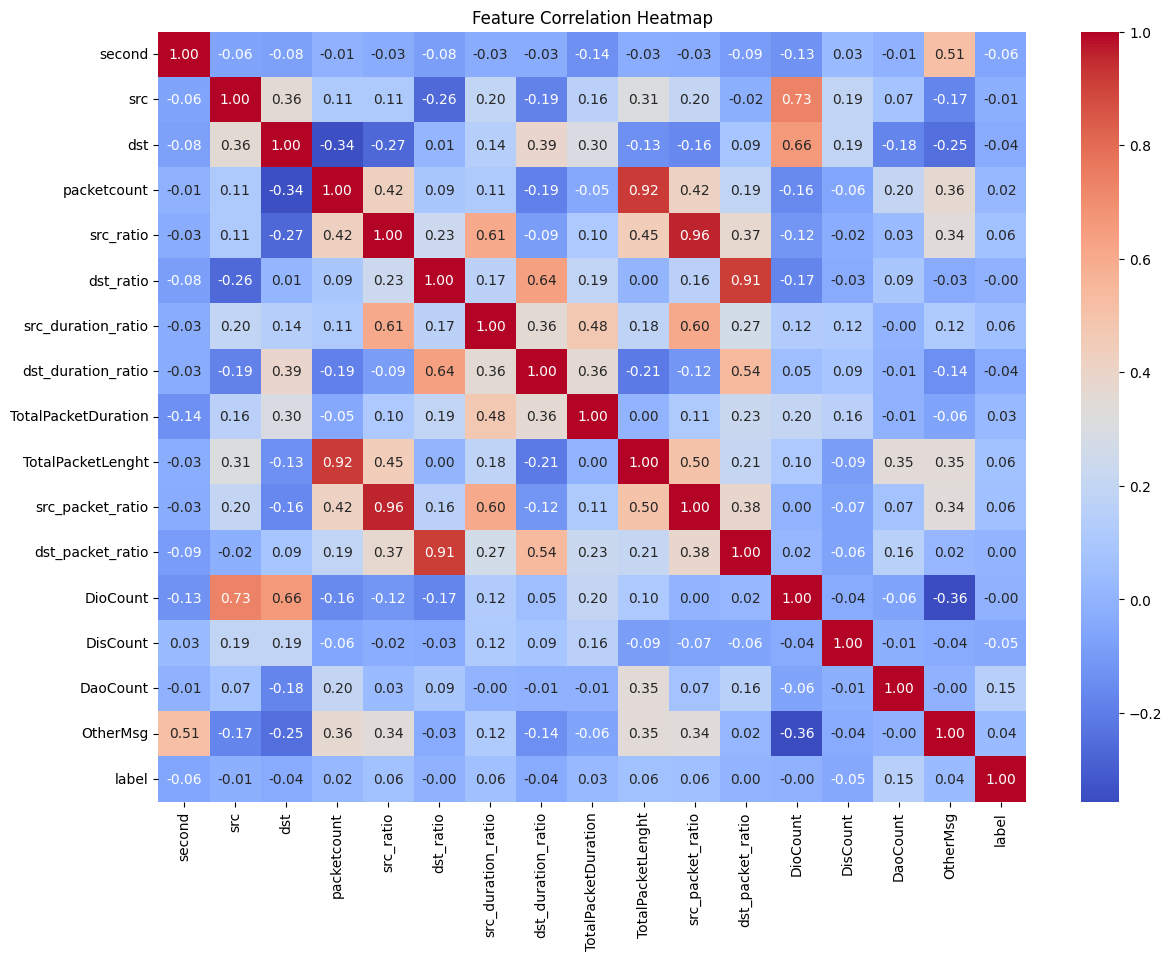

In [23]:
plt.figure(figsize=(14, 10))
corr = dataset.drop(columns=['AttackType']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

## Feature Distributions

Plot distributions per feature, optionally grouped by attack type:

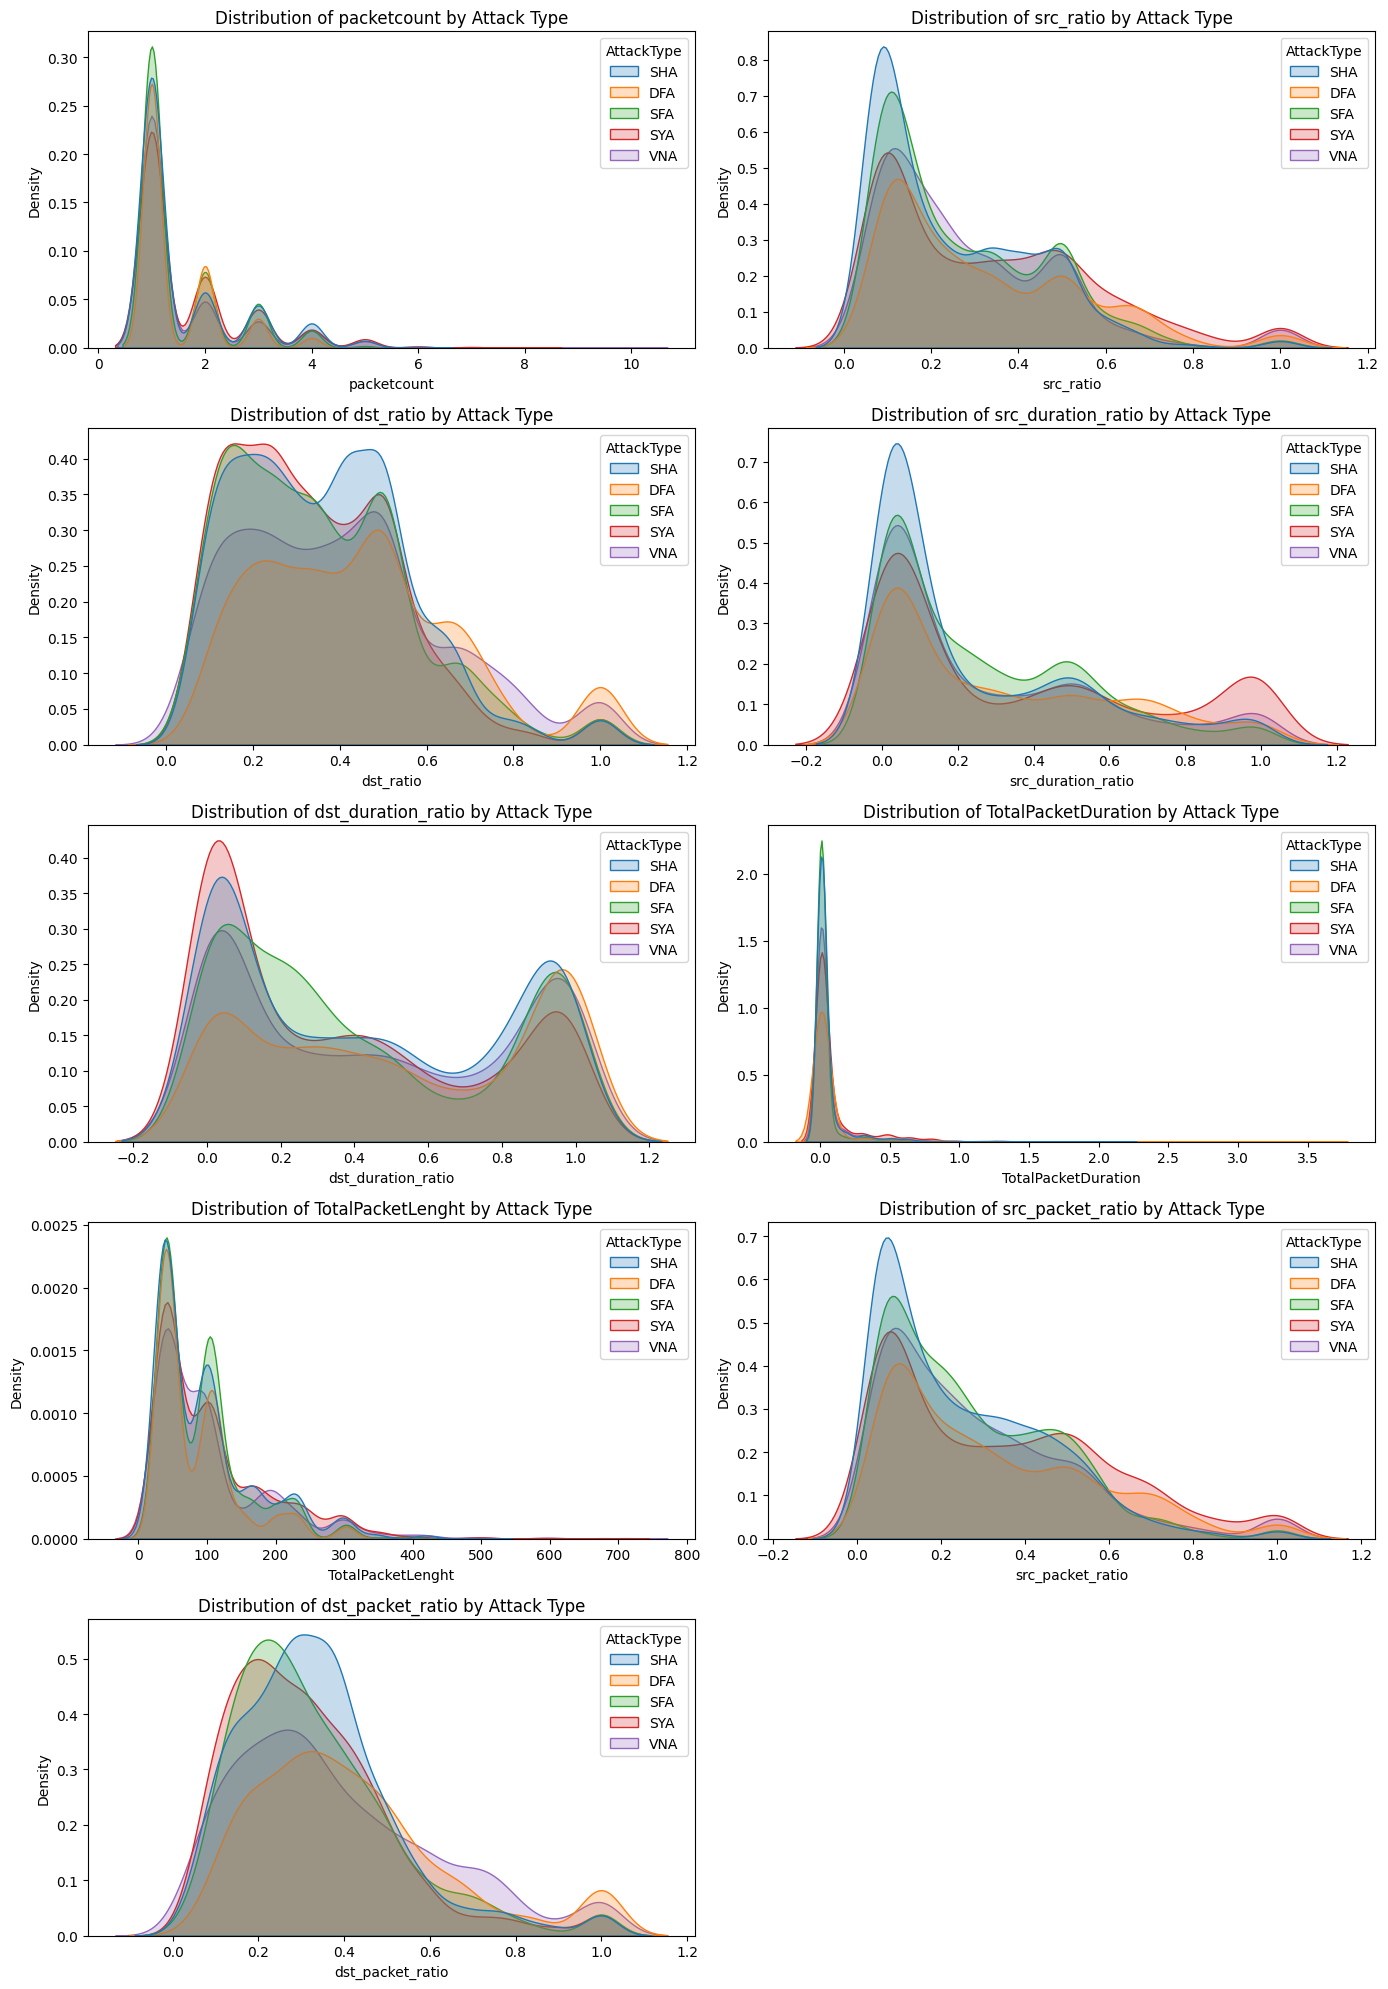

In [25]:
num_cols = ['packetcount', 'src_ratio', 'dst_ratio', 'src_duration_ratio',
            'dst_duration_ratio', 'TotalPacketDuration', 'TotalPacketLenght',
            'src_packet_ratio', 'dst_packet_ratio']


# Create subplots: 5 rows, 2 columns (to accommodate 9 plots)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 20))
axes = axes.flatten()  # Flatten to easily iterate

for i, col in enumerate(num_cols):
    sns.kdeplot(data=dataset, x=col, hue='AttackType', fill=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Attack Type')

# Hide the 10th subplot if it exists (since we only have 9 plots)
if len(axes) > len(num_cols):
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

## Pairwise Feature Visualization

Use pairplot for a few selected features:

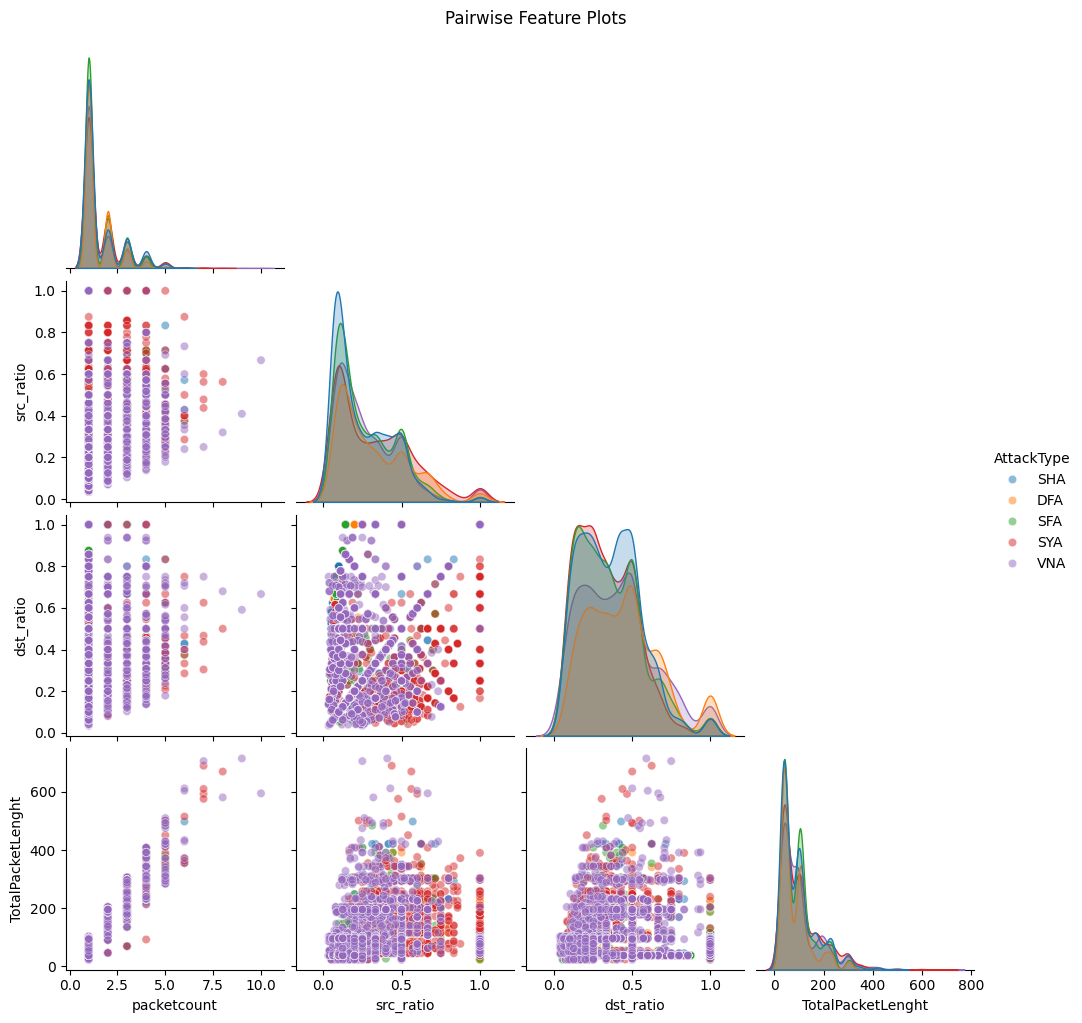

In [26]:
sns.pairplot(dataset, vars=['packetcount', 'src_ratio', 'dst_ratio', 'TotalPacketLenght'],
             hue='AttackType', corner=True, plot_kws={'alpha': 0.5})
plt.suptitle('Pairwise Feature Plots', y=1.02)
plt.show()

## Time-based Patterns

If the second column, is Simulation time in seconds when the packet or event was recorded. Useful for time-series or temporal pattern detection. Lets explore attacks over time:

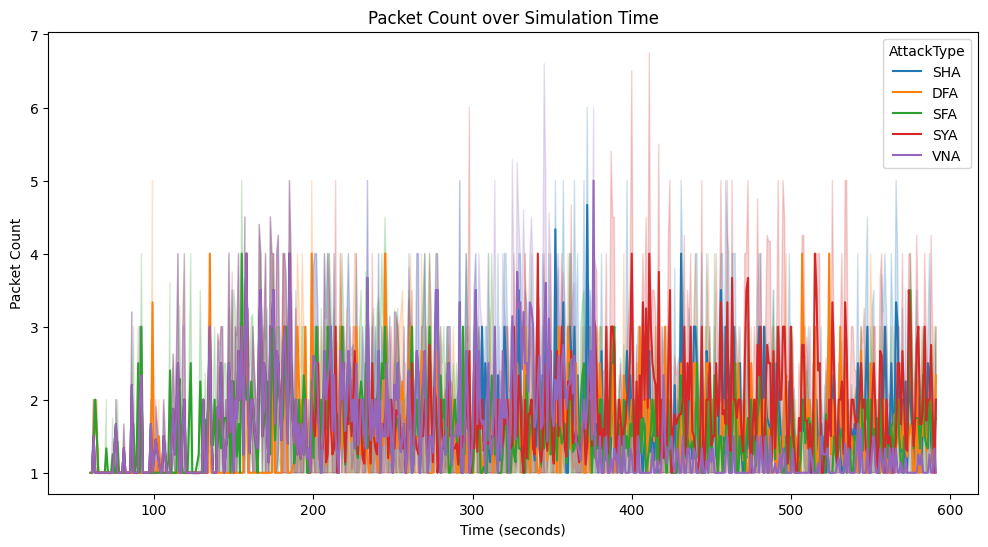

In [27]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dataset, x='second', y='packetcount', hue='AttackType')
plt.title('Packet Count over Simulation Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Packet Count')
plt.show()

## Message Counts by Attack Type

Stacked bar chart of message types per attack:

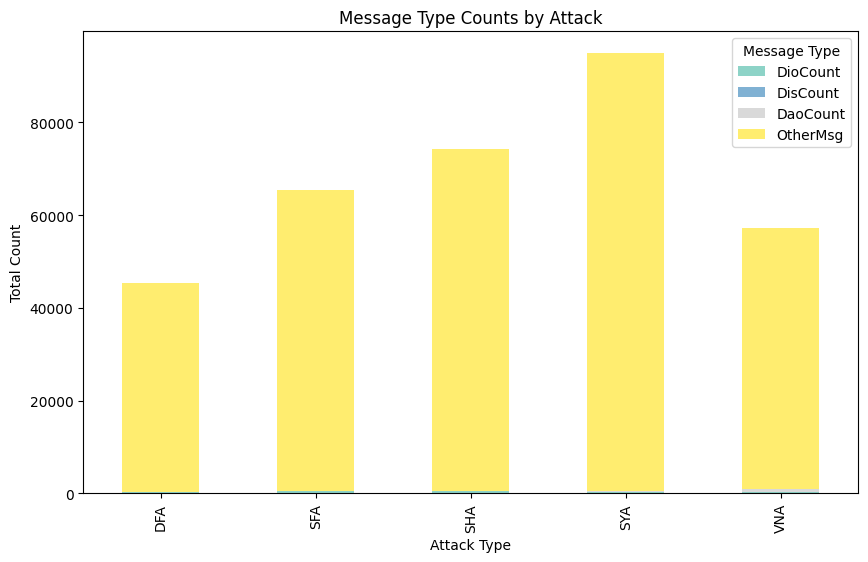

In [28]:
message_counts = dataset.groupby('AttackType')[['DioCount', 'DisCount', 'DaoCount', 'OtherMsg']].sum()

message_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Message Type Counts by Attack')
plt.ylabel('Total Count')
plt.xlabel('Attack Type')
plt.legend(title='Message Type')
plt.show()

## Summary Statistics per Attack


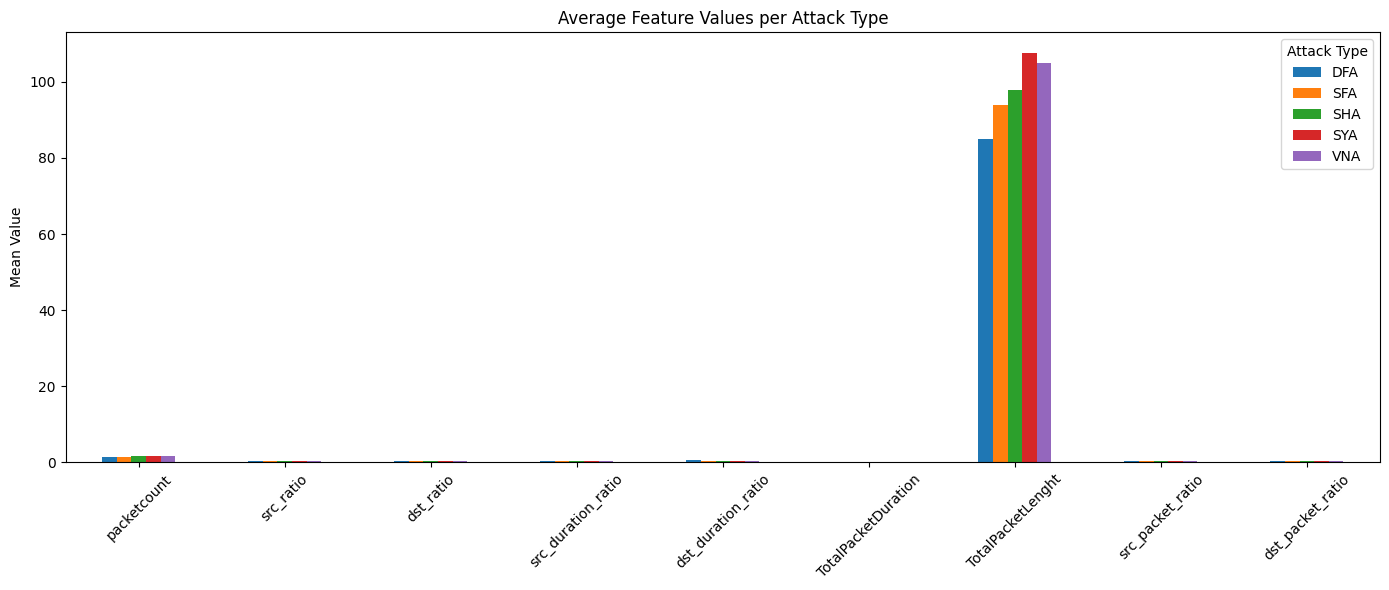

In [35]:
dataset['AttackType'] = dataset['label'].map(attack_map)

dataset.groupby('AttackType')[num_cols].mean().T.plot(kind='bar', figsize=(14, 6))
plt.title('Average Feature Values per Attack Type')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(title='Attack Type')
plt.tight_layout()
plt.show()



#Task 2: Develop Machine learning